# Nonlinear Pendulum

Consider the problem of a pendulum consisting of a mass suspended from a massless, inextensible rod of length $l$.

The equation of motion of the mass can be derived using Newtonian mechanics.

\begin{gather*}
    \sum F_r = T - mg\cos\theta = ml\dot{\theta}^2 \\
    \sum F_\theta = -mg\sin\theta = ml\ddot{\theta} \\
    \ddot{\theta} = -\frac{g}{l} \sin\theta
\end{gather*}

The equation of motion can be solved for $\theta(t)$ given $\theta(0) = \theta_0$ and $\dot{\theta}(0) = \omega_0$. 

The equation of motion can be transformed into a first order initial value problem (i.e. $y'(t) = f(t, y(t))$) which can be solved numerically using the Runge-Kutta method (RK4).

$$\frac{d}{dt} \begin{bmatrix} \theta \\ \omega \end{bmatrix} = \begin{bmatrix} \omega \\ -\frac{g}{l} \sin\theta \end{bmatrix}$$

with initial conditions $\theta(0) = \theta_0$ and $\omega(0) = \omega_0$


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

In [2]:
def rk4(f, y0, t=1, h=0.01):
    n = math.ceil(t / h)
    y_t = np.zeros((len(y0)+1, n+1))
    y_t[0, :] = h * np.linspace(0, n, n+1)
    y_t[1:, 0] = y0
    
    for i in range(1, n+1):
        k1 = f(y_t[0, i-1], y_t[1:, i-1])
        k2 = f(y_t[0, i-1] + h/2, y_t[1:, i-1] + h*k1/2)
        k3 = f(y_t[0, i-1] + h/2, y_t[1:, i-1] + h*k2/2)
        k4 = f(y_t[0, i-1] + h, y_t[1:, i-1] + h*k3)
        
        y_t[1:, i] = y_t[1:, i-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    
    return y_t

In [3]:
g = 9.8
l = 1

def f(t, y):
    return np.array([y[1], -g / l * np.sin(y[0])])

t_end = 10
h = 0.02

rk4_solution = rk4(f, np.array([np.pi/2, 0]), t_end, h)

In [6]:
fig, ax = plt.subplots()

theta_curve, = ax.plot(rk4_solution[0,0], rk4_solution[1,0])
theta_dot_curve, = ax.plot(rk4_solution[0,0], rk4_solution[2,0])

ax.set_xlim([rk4_solution[0,0], rk4_solution[0,-1]])
ax.set_ylim([np.floor(np.min(rk4_solution[1:,:])), np.ceil(np.max(rk4_solution[1:,:]))])
ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$\theta$ [rad], $\dot{\theta}$ [rad/s]")
ax.legend([r"$\theta$ [rad]", r"$\dot{\theta}$ [rad/s]"], loc="upper right")
ax.grid()

def animate(i):
    theta_curve.set_data(rk4_solution[0, :i+1], rk4_solution[1, :i+1])
    theta_dot_curve.set_data(rk4_solution[0, :i+1], rk4_solution[2, :i+1])

anim = animation.FuncAnimation(fig, animate, frames=rk4_solution.shape[1], interval=h*1000)
anim.save("output/rk4_solution_plot.mp4", dpi=300, writer=animation.FFMpegWriter(fps=50))
plt.close()

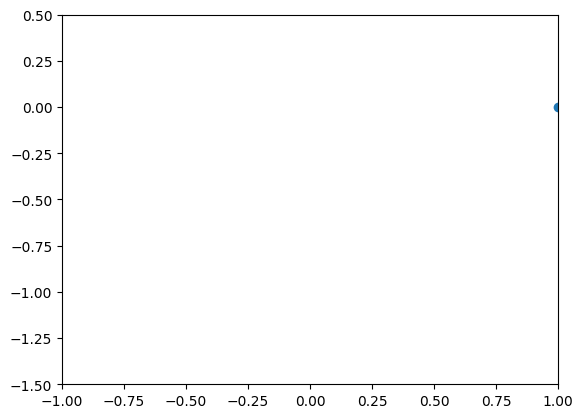

In [5]:
def animate_pendulum(t, theta):
    fig, ax = plt.subplots()

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1.5, 0.5])

    mass_x = np.sin(theta[0])
    mass_y = -np.cos(theta[0])

    mass, = ax.plot(mass_x, mass_y, "o") 

animate_pendulum(rk4_solution[0,:], rk4_solution[1,:])